<a href="https://colab.research.google.com/github/guilherme3987/deteccao_outliers/blob/main/Atividade_LPIII_Detec%C3%A7%C3%A3o_de_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecção de Outliers**

---
#**Análise exploratória de pesos vs alturas.**




In [ ]:
import pandas as pd

df = pd.read_csv('/content/ObesityData.csv')
df.head()

#Informações
df.info()

#Estatísticas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##Quartis

* **Q1: 25% dos valores estão abaixo de:**
  - **Height**
    - **1.630000**
  - **Weight**
    - **65.473343**

* **Q2(Mediana): 50% dos valores estão abaixo de:**
  - **Height**
    - **1.700499**
  - **Weight**
    - **83.000000**
* **Q3: 75% dos valores estão abaixo de:**
  - **Heigh**t
    - **1.768464**
  - **Weight**
    - **107.430682**





##**Outliers Heigth**

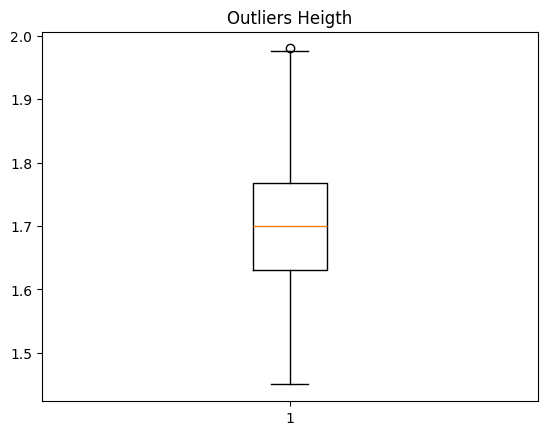

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.subplot()
plt.boxplot(df['Height'])
plt.title('Outliers Heigth')
plt.show()

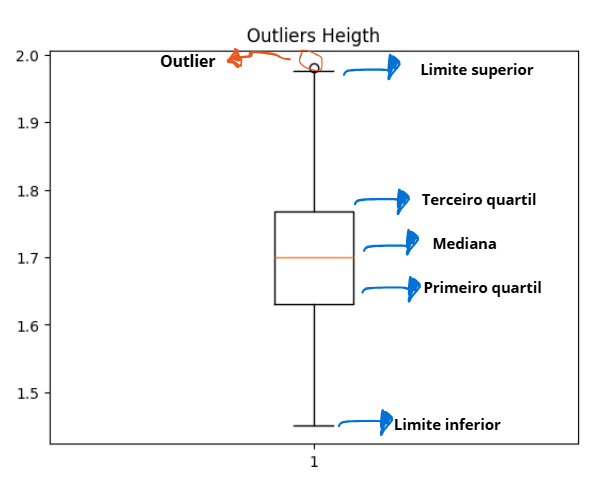

##**Outliers Weight**

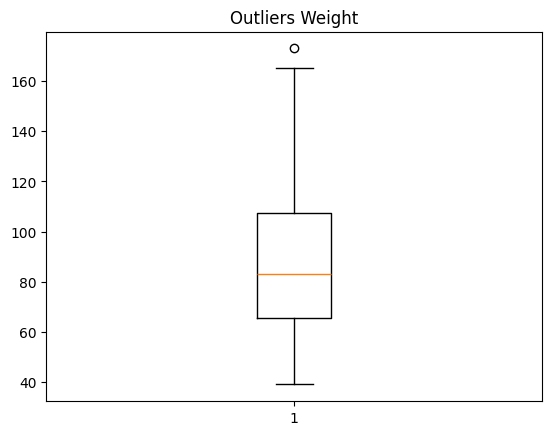

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

plt.subplot()
plt.boxplot(df['Weight'])
plt.title('Outliers Weight')
plt.show()

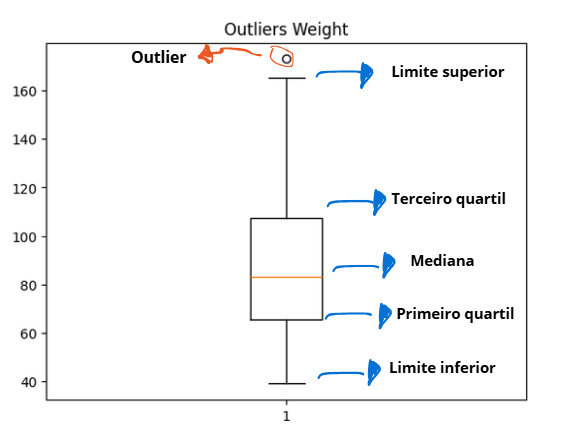

##**Manter os dados ou não ?**


*   **Muitos Outliers podem distorcer a média e desvio padrão.**
*   **Poucos/1 Outliers podem ser atípico, erro de medição e etc.. .**



##**Como encontrar os outliers no dataset ?**


*   **Dado é maior que o limite superior ou inferior ?**



In [40]:
import pandas as pd

estatisticas_gerais = df.describe()

quantis_height = estatisticas_gerais.loc[['25%','50%','75%'],['Height']]
quantis_weight = estatisticas_gerais.loc[['25%','50%','75%'],['Weight']]

#print(quantis_height)
#print(quantis_weight,'\n')

# convenção: Intervalo entre quantis é Q3 - Q1
# limite superior = Q3 + 1.5 X INTERVALO_QUANTIS
# limite inferior = Q1 - 1.5 X INTERVALO_QUANTIS

# intervalos para Height e Weight
intervalo_weight = quantis_weight.loc['75%'] - quantis_weight.loc['25%']
intervalo_height = quantis_height.loc['75%'] - quantis_height.loc['25%']

# limites superior e inferior para Height
limite_superior_height = quantis_height.loc['75%'] + (1.5 * intervalo_height)
limite_inferior_height = quantis_height.loc['25%'] - (1.5 * intervalo_height)

# limites superior e inferior para Weight
limite_superior_weight = quantis_weight.loc['75%'] + (1.5 * intervalo_weight)
limite_inferior_weight = quantis_weight.loc['25%'] - (1.5 * intervalo_weight)

#print('Limite superior Height',limite_superior_height,'\n')
#print('Limite inferior Height',limite_inferior_height,'\n')

#print('Limite superior Weight',limite_superior_weight,'\n')
#print('Limite inferior Weight',limite_inferior_weight,'\n')

# encontrar outlier Height
outlier_height = df[(df['Height'] < limite_inferior_height.iloc[0]) | (df['Height'] > limite_superior_height.iloc[0])]

print('\nOutlier encontrado na linha: ',outlier_height,'\n')

# encontrar outlier Weight
outlier_weight = df[(df['Weight'] < limite_inferior_weight.iloc[0]) | (df['Weight'] > limite_superior_weight.iloc[0])]
print('\nOutlier encontrado na linha: ',outlier_weight,'\n')



Outlier encontrado na linha:      Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
349   Male  20.0    1.98   125.0                            yes  yes   2.0   

     NCP    CAEC SMOKE  CH2O SCC  FAF  TUE       CALC                 MTRANS  \
349  3.0  Always    no   3.0  no  1.0  1.0  Sometimes  Public_Transportation   

         NObeyesdad  
349  Obesity_Type_I   


Outlier encontrado na linha:      Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
344   Male  18.0    1.87   173.0                            yes  yes   3.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
344  3.0  Frequently    no   2.0  no  2.0  1.0  Sometimes   

                    MTRANS        NObeyesdad  
344  Public_Transportation  Obesity_Type_III   



##**Desvio padrão**



*   Dados próximos ou distantes da média ?



In [ ]:
# fórmula variância = std / mean
weight_std = df['Weight'].std()
weight_mean = df['Weight'].mean()
weight_var = (weight_std/ weight_mean)*100 # %

print('Desvio Padrão: ',weight_std)
print('Média:',weight_mean)
print('Variação',weight_var)

Desvio Padrão:  26.191171745204688
Média: 86.58605812648035
Variação 30.24871707053115


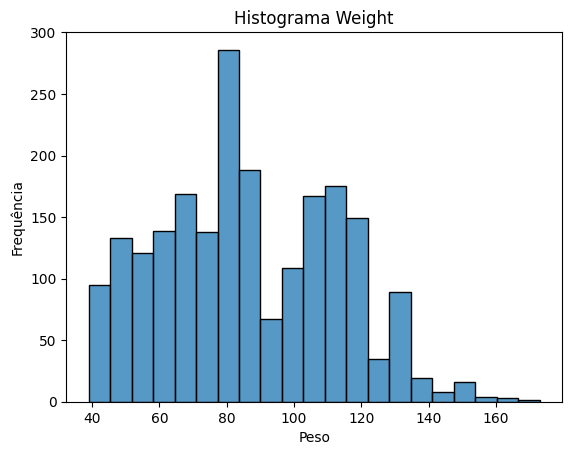

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Weight'])

plt.title("Histograma Weight")
plt.xlabel('Peso')
plt.ylabel('Frequência')
plt.show()